In [50]:
using Oceananigans
using GLMakie

Nx = 128
Nz = 128
Lx = 2
Lz = 1

grid = RectilinearGrid(size=(Nx, Nz), x=(-Lx/2, Lx/2), z=(0, Lz), topology=(Periodic, Flat, Bounded))

128×1×128 RectilinearGrid{Float64, Periodic, Flat, Bounded} on CPU with 3×0×3 halo
├── Periodic x ∈ [-1.0, 1.0)      regularly spaced with Δx=0.015625
├── Flat y
└── Bounded  z ∈ [0.0, 1.0]       regularly spaced with Δz=0.0078125

In [51]:
# Buoyancy!
top_buoyancy_bc = FluxBoundaryCondition(1)
buoyancy_bcs = FieldBoundaryConditions(top=top_buoyancy_bc)
buoyancy = BuoyancyTracer()

model = NonhydrostaticModel(; grid,
                            timestepper = :RungeKutta3,
                            advection = WENO(order=5),
                            buoyancy = BuoyancyTracer(),
                            tracers = :b,
                            boundary_conditions = (; b=buoyancy_bcs))

NonhydrostaticModel{CPU, RectilinearGrid}(time = 0 seconds, iteration = 0)
├── grid: 128×1×128 RectilinearGrid{Float64, Periodic, Flat, Bounded} on CPU with 3×0×3 halo
├── timestepper: RungeKutta3TimeStepper
├── advection scheme: WENO reconstruction order 5
├── tracers: b
├── closure: Nothing
├── buoyancy: BuoyancyTracer with ĝ = NegativeZDirection()
└── coriolis: Nothing

In [52]:
N² = 0.1
bi(x, z) = N² * z + 1e-2 * randn()
set!(model, b=bi)
    
simulation = Simulation(model, Δt=0.01, stop_iteration=400)

conjure_time_step_wizard!(simulation, cfl=0.7)

progress(sim) = @info string("Iter: ", iteration(sim), ", time: ", time(sim))
add_callback!(simulation, progress, IterationInterval(10))

run!(simulation)

[ Info: Initializing simulation...
[ Info: Iter: 0, time: 0.0
[ Info:     ... simulation initialization complete (172.342 ms)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (2.789 seconds).
[ Info: Iter: 10, time: 0.11000000000000004
[ Info: Iter: 20, time: 0.23100000000000004
[ Info: Iter: 30, time: 0.3640999999999995
[ Info: Iter: 40, time: 0.48957339372546377
[ Info: Iter: 50, time: 0.5523100905881957
[ Info: Iter: 60, time: 0.6070576261073042
[ Info: Iter: 70, time: 0.6580851233327385
[ Info: Iter: 80, time: 0.7007652566404539
[ Info: Iter: 90, time: 0.7364101644972816
[ Info: Iter: 100, time: 0.7650204356549701
[ Info: Iter: 110, time: 0.7902813158265405
[ Info: Iter: 120, time: 0.8150123870897437
[ Info: Iter: 130, time: 0.8398181290141111
[ Info: Iter: 140, time: 0.865461407689861
[ Info: Iter: 150, time: 0.8908789910130883
[ Info: Iter: 160, time: 0.9163182298609558
[ Info: Iter: 170, time: 0.9433333011146412
[ Info: Iter: 180, time: 0.9712289

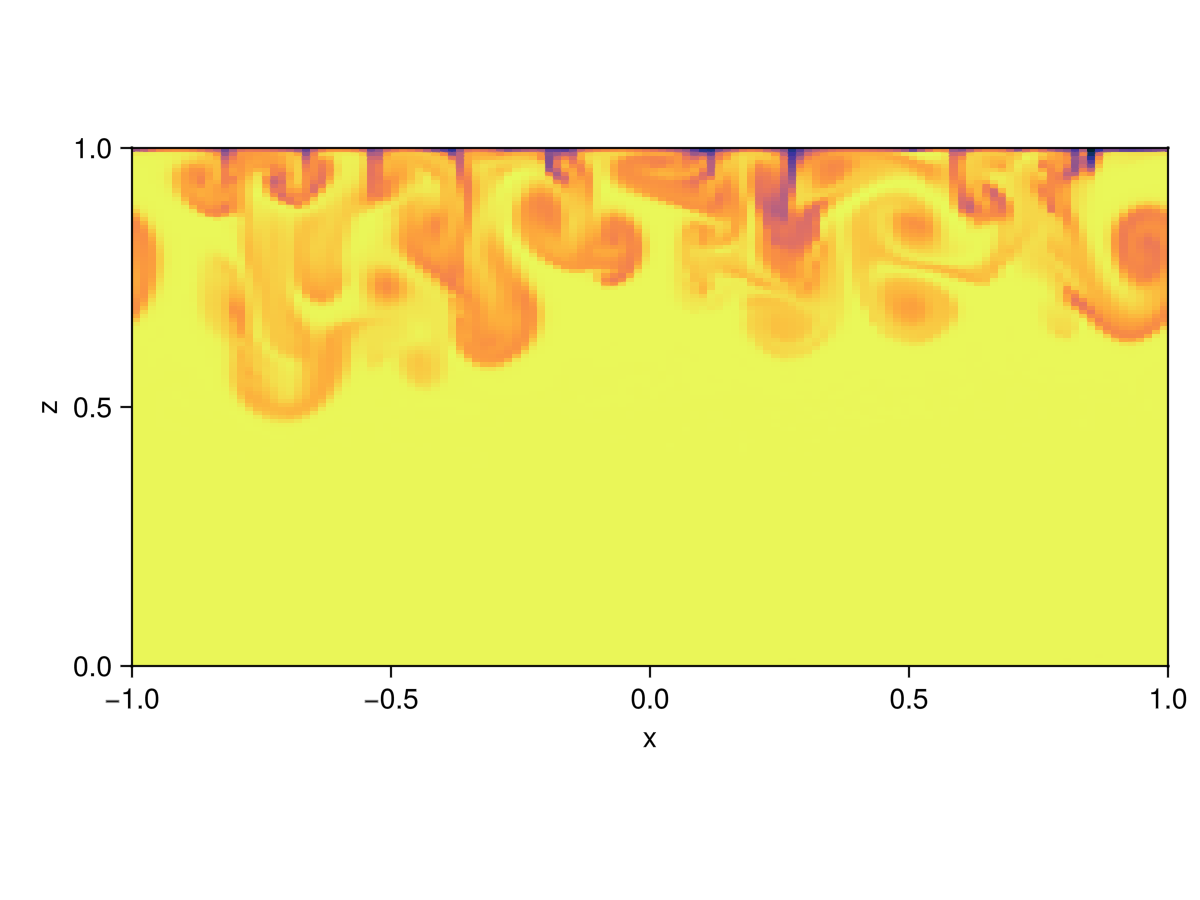

In [53]:
fig = Figure()
ax = Axis(fig[1, 1], aspect=2, xlabel="x", ylabel="z")

x, y, z = nodes(model.tracers.b)
bn = interior(model.tracers.b, :, 1, :)

heatmap!(ax, x, z, bn, colormap=:thermal)
fig

# How about something more interesting

In [54]:
# Buoyancy!
Jb(x, t) = cos(π * x)

top_buoyancy_bc = FluxBoundaryCondition(Jb)

FluxBoundaryCondition: ContinuousBoundaryFunction Jb at (Nothing, Nothing, Nothing)

In [74]:
buoyancy_bcs = FieldBoundaryConditions(top=top_buoyancy_bc)

model = NonhydrostaticModel(; grid,
                            buoyancy = BuoyancyTracer(),
                            timestepper = :RungeKutta3,
                            advection = WENO(order=5),
                            boundary_conditions = (; b=buoyancy_bcs))

LoadError: (:b,) must be among the list of tracers to use BuoyancyTracer

In [75]:
model = NonhydrostaticModel(; grid,
                            tracers = :b,
                            buoyancy = BuoyancyTracer(),
                            timestepper = :RungeKutta3,
                            advection = WENO(order=5),
                            boundary_conditions = (; b=buoyancy_bcs))

NonhydrostaticModel{CPU, RectilinearGrid}(time = 0 seconds, iteration = 0)
├── grid: 128×1×128 RectilinearGrid{Float64, Periodic, Flat, Bounded} on CPU with 3×0×3 halo
├── timestepper: RungeKutta3TimeStepper
├── advection scheme: WENO reconstruction order 5
├── tracers: b
├── closure: Nothing
├── buoyancy: BuoyancyTracer with ĝ = NegativeZDirection()
└── coriolis: Nothing

┌ Warning: error in renderloop
│   exception =
│    InterruptException:
│    Stacktrace:
│      [1] poptask(W::Base.IntrusiveLinkedListSynchronized{Task})
│        @ Base ./task.jl:985
│      [2] wait()
│        @ Base ./task.jl:994
│      [3] wait(c::Base.GenericCondition{Base.Threads.SpinLock}; first::Bool)
│        @ Base ./condition.jl:130
│      [4] wait
│        @ Base ./condition.jl:125 [inlined]
│      [5] _trywait(t::Timer)
│        @ Base ./asyncevent.jl:142
│      [6] wait
│        @ Base ./asyncevent.jl:159 [inlined]
│      [7] sleep(sec::Float64)
│        @ Base ./asyncevent.jl:265
│      [8] on_demand_renderloop(screen::GLMakie.Screen{GLFW.Window})
│        @ GLMakie ~/.julia/packages/GLMakie/Wvj4h/src/screen.jl:947
│      [9] renderloop(screen::GLMakie.Screen{GLFW.Window})
│        @ GLMakie ~/.julia/packages/GLMakie/Wvj4h/src/screen.jl:963
│     [10] (::GLMakie.var"#67#68"{GLMakie.Screen{GLFW.Window}})()
│        @ GLMakie ~/.julia/packages/GLMakie/Wvj4h/src/screen.jl:8

In [59]:
model.tracers.b.boundary_conditions.top

FluxBoundaryCondition: ContinuousBoundaryFunction Jb at (Center, Center, Nothing)

In [60]:
N² = 0.1
bi(x, z) = N² * z + 1e-3 * randn()
set!(model, b=bi)
    
simulation = Simulation(model, Δt=0.01, stop_iteration=200)

conjure_time_step_wizard!(simulation, cfl=0.7)

progress(sim) = @info string("Iter: ", iteration(sim), ", time: ", time(sim))
add_callback!(simulation, progress, IterationInterval(10))

run!(simulation)

[ Info: Initializing simulation...
[ Info: Iter: 0, time: 0.0
[ Info:     ... simulation initialization complete (183.540 ms)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (2.068 seconds).
[ Info: Iter: 10, time: 0.11000000000000004
[ Info: Iter: 20, time: 0.23100000000000004
[ Info: Iter: 30, time: 0.3640999999999995
[ Info: Iter: 40, time: 0.5105099999999991
[ Info: Iter: 50, time: 0.5837149999999998
[ Info: Iter: 60, time: 0.6443174939027181
[ Info: Iter: 70, time: 0.7054366898217963
[ Info: Iter: 80, time: 0.7489298991860533
[ Info: Iter: 90, time: 0.7906692458428062
[ Info: Iter: 100, time: 0.8277215117949317
[ Info: Iter: 110, time: 0.865181931740568
[ Info: Iter: 120, time: 0.9008378369935339
[ Info: Iter: 130, time: 0.9382220751589316
[ Info: Iter: 140, time: 0.9755565294293784
[ Info: Iter: 150, time: 1.0109650699066197
[ Info: Iter: 160, time: 1.0456492082417657
[ Info: Iter: 170, time: 1.077827331185972
[ Info: Iter: 180, time: 1.107027814

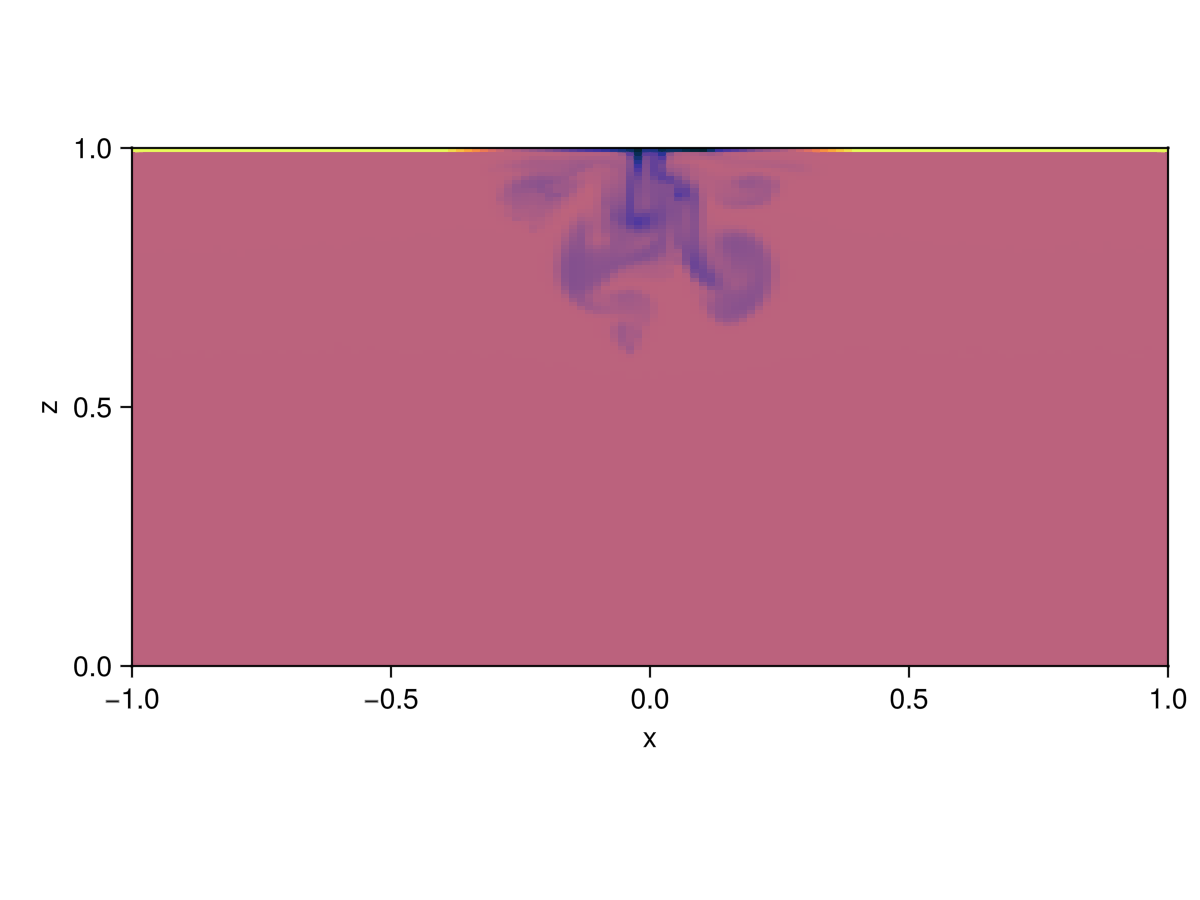

In [72]:
fig = Figure()
ax = Axis(fig[1, 1], aspect=2, xlabel="x", ylabel="z")

x, y, z = nodes(model.tracers.b)
bn = interior(model.tracers.b, :, 1, :)

bmin, bmax = extrema(model.tracers.b)
heatmap!(ax, x, z, bn, colormap=:thermal, colorrange=(bmin, bmax/4))
fig